In [1]:
import os
WM_PROJECT_USER_DIR=os.environ['WM_PROJECT_USER_DIR']
import sys 
sys.path.append(f"{WM_PROJECT_USER_DIR}/utilities")
import numpy as np
import pandas as pd
import postProcess.polyMesh2d as mesh2d
import postProcess.pyResconstruct as pyResconstruct
import postProcess.pyFigure as pyFigure
import matplotlib.pyplot as plt
import json

data_folder=os.path.abspath('../postProcess')
save_folder=os.path.abspath('../postProcess/images')

## Why this compare?
- These cases are almost the same but one is set with the different Cp for different gas component, but the other keep the same Cp among all the gas components for less coupling with flow and heat transfer and thus better convergency.


## Pe=0.02
- case1: full1
- case2: full1_5

### Read min/max temperature of the case with different CP

In [18]:
path1="/home/anoldfriend/OpenFOAM/anoldfriend-7/run/cokeCombustion/full1/postProcessing/minMaxComponents/fieldMinMax.dat"
df1=pyFigure.read_min_max_field(path1,50,'T')
df1=df1[df1["Time"]>=0.01]
df1.head()

,Time,field,min,location(min),max,location(max)
21,0.01006,T,771.0978,(3.922500e-04 4.502500e-04 2.500000e-07),1064.345,(1.725000e-05 5.422500e-04 2.500000e-07)
22,0.01056,T,771.1372,(3.922500e-04 4.502500e-04 2.500000e-07),1059.872,(1.775000e-05 5.422500e-04 2.500000e-07)
23,0.01106,T,771.1842,(3.927500e-04 4.497500e-04 2.500000e-07),1054.954,(1.775000e-05 5.422500e-04 2.500000e-07)
24,0.01156,T,771.2369,(3.927500e-04 4.497500e-04 2.500000e-07),1051.280,(1.825000e-05 5.422500e-04 2.500000e-07)
25,0.01206,T,771.2838,(4.327500e-04 4.642500e-04 2.500000e-07),1047.070,(1.825000e-05 5.422500e-04 2.500000e-07)


### Read min/max temperature of the case with same CP

In [20]:
path2="/home/anoldfriend/OpenFOAM/anoldfriend-7/run/cokeCombustion/full1_5/postProcessing/minMaxComponents2/8.35/fieldMinMax_0.dat"
df2=pyFigure.read_min_max_field(path2,1,'T')
df2=df2[df2["Time"]>=0.01]
df2=df2[df2["Time"]<5.0]
df2.head()

,Time,field,min,location(min),max,location(max)
1,0.01,T,773.0,(0.000000e+00 2.500000e-07 2.500000e-07),1085.600,(1.725000e-05 5.422500e-04 2.500000e-07)
2,0.02,T,773.0,(0.000000e+00 2.500000e-07 2.500000e-07),1025.710,(2.175000e-05 5.427500e-04 2.500000e-07)
3,0.03,T,773.0,(0.000000e+00 2.500000e-07 2.500000e-07),1000.810,(2.525000e-05 5.442500e-04 2.500000e-07)
4,0.04,T,773.0,(0.000000e+00 2.500000e-07 2.500000e-07),986.558,(2.775000e-05 5.457500e-04 2.500000e-07)
5,0.05,T,773.0,(0.000000e+00 2.500000e-07 2.500000e-07),976.992,(3.075000e-05 5.472500e-04 2.500000e-07)


### Show comparisons

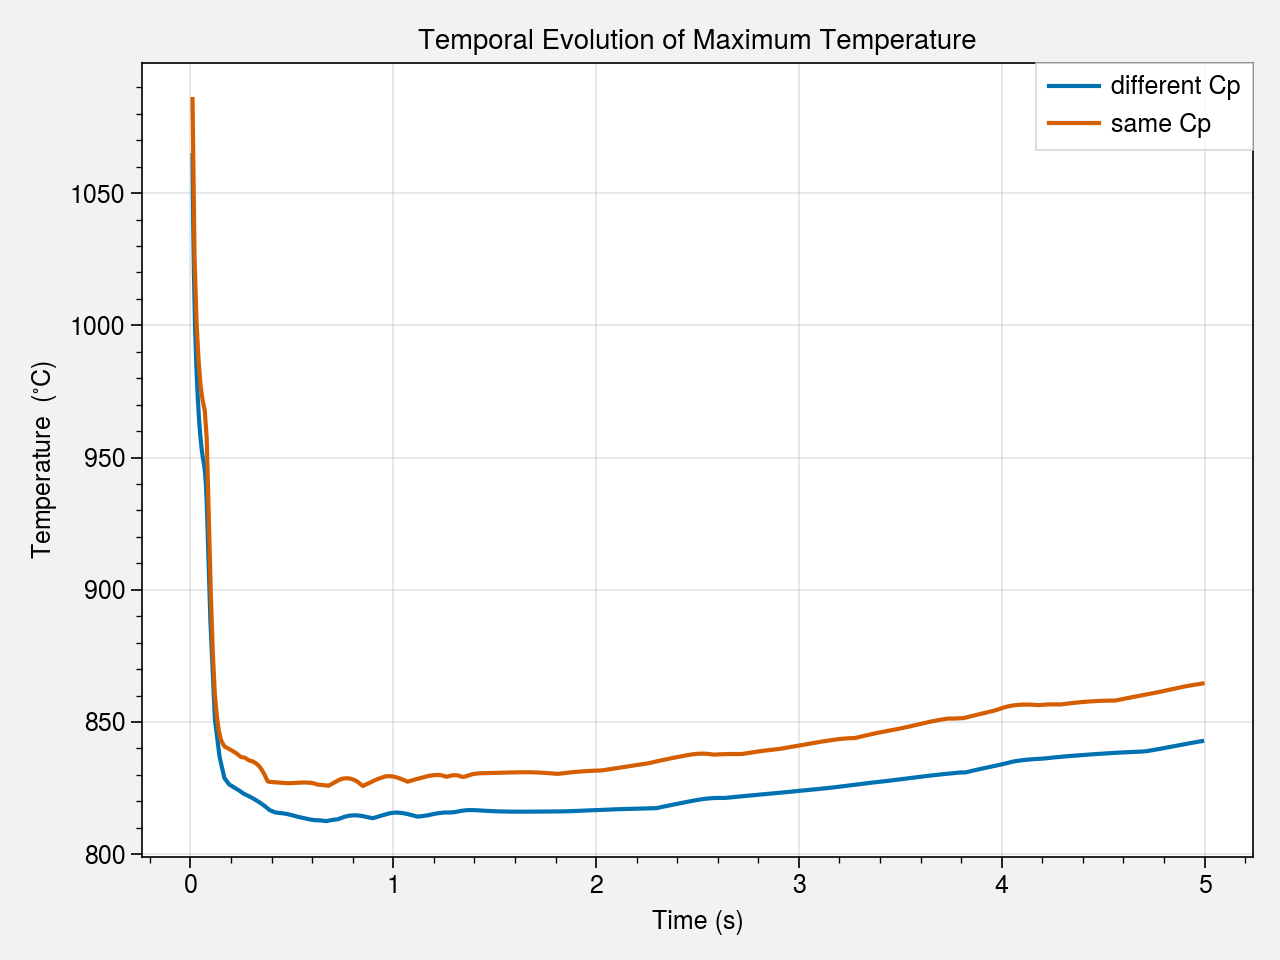

In [21]:
fig, ax = plt.subplots()
ax.plot(df1["Time"],df1["max"],label="different Cp")
ax.plot(df2["Time"],df2["max"],label="same Cp")
ax.set_xlabel(f"Time (s)")
ax.set_ylabel("Temperature  ($^{\circ}$C)")
ax.set_title("Temporal Evolution of Maximum Temperature")
ax.legend()
fig.tight_layout()

### Comments:
- The temperature with the same Cp is lower than the temperature with the different Cp
- Reason: the case with the same Cp set the Cp as the oxygen Cp with the value of 1094.2, which is lower than both N2 (1117.3) and CO2 (1162.1). 
- suggestions: use the average value of the Cp values of N2 and CO2

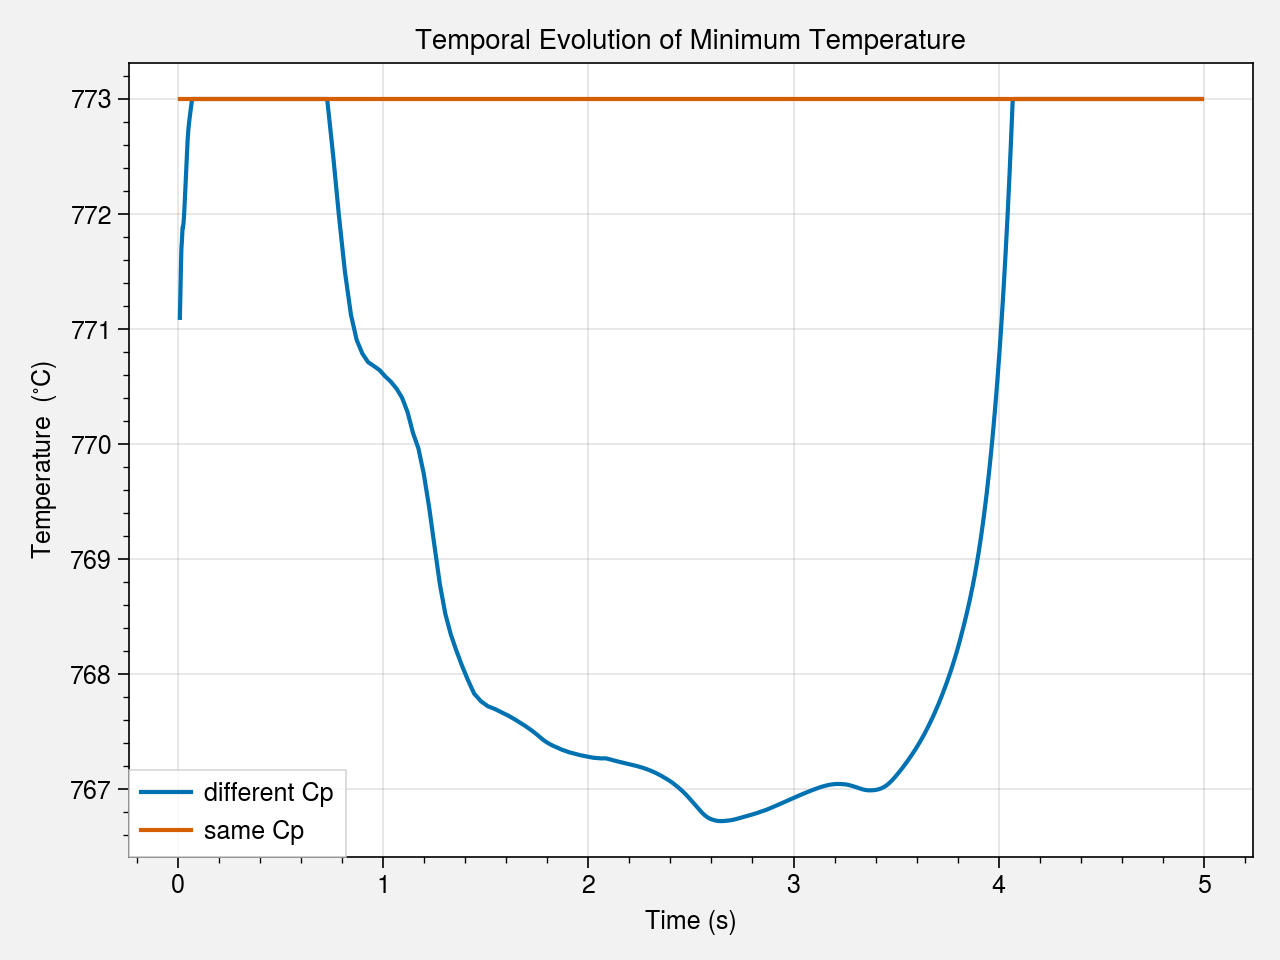

In [28]:
fig, ax = plt.subplots()
ax.plot(df1["Time"],df1["min"],label="different Cp")
ax.plot(df2["Time"],df2["min"],label="same Cp")
ax.set_xlabel(f"Time (s)")
ax.set_ylabel("Temperature  ($^{\circ}$C)")
ax.set_title("Temporal Evolution of Minimum Temperature")
ax.legend()
fig.tight_layout()

### Comments:
- the temperature lower than the initital temperature of 773K is not physical.
- Reason: numerical issue which comes from the strong coupling of heat transfer and mass transfer and reactions. The unconvergent PIMPLE loop pf the same CP case from the time of 2 seconds is lower than 5, but the different Cp case has at least 169 unconvergent PIMPLE loop

## Pe=0.1
- case3: full2
- case4: full2_1

### Read min/max temperature of the case with different CP

In [22]:
path3="/home/anoldfriend/OpenFOAM/anoldfriend-7/run/cokeCombustion/full2/postProcessing/minMaxComponents/fieldMinMax.dat"
df3=pyFigure.read_min_max_field(path3,50,'T')
df3=df3[df3["Time"]>=0.01]
df3.head()

,Time,field,min,location(min),max,location(max)
11,0.050012,T,772.9542,(9.937500e-04 2.500000e-07 2.500000e-07),1007.292,(3.275000e-05 5.477500e-04 2.500000e-07)
12,0.050112,T,772.9544,(9.937500e-04 2.500000e-07 2.500000e-07),1007.288,(3.275000e-05 5.477500e-04 2.500000e-07)
13,0.050212,T,772.9546,(9.937500e-04 2.500000e-07 2.500000e-07),1007.251,(3.275000e-05 5.477500e-04 2.500000e-07)
14,0.050312,T,772.9548,(9.937500e-04 2.500000e-07 2.500000e-07),1007.231,(3.275000e-05 5.477500e-04 2.500000e-07)
15,0.050412,T,772.9549,(9.937500e-04 2.500000e-07 2.500000e-07),1007.215,(3.275000e-05 5.477500e-04 2.500000e-07)


In [26]:
path4="/home/anoldfriend/OpenFOAM/anoldfriend-7/run/cokeCombustion/full2_1/postProcessing/minMaxComponents2/1.93/fieldMinMax.dat"
df4=pyFigure.read_min_max_field(path4,1,'T')
df4=df4[df4["Time"]>=0.01]
df4.head()

,Time,field,min,location(min),max,location(max)
1,0.01,T,773.0,(0.000000e+00 2.500000e-07 2.500000e-07),1104.84,(1.775000e-05 5.422500e-04 2.500000e-07)
2,0.02,T,773.0,(0.000000e+00 2.500000e-07 2.500000e-07),1044.31,(2.225000e-05 5.427500e-04 2.500000e-07)
3,0.03,T,773.0,(0.000000e+00 2.500000e-07 2.500000e-07),1020.66,(2.575000e-05 5.442500e-04 2.500000e-07)
4,0.04,T,773.0,(0.000000e+00 2.500000e-07 2.500000e-07),1008.21,(2.875000e-05 5.457500e-04 2.500000e-07)
5,0.05,T,773.0,(0.000000e+00 2.500000e-07 2.500000e-07),1000.95,(3.175000e-05 5.472500e-04 2.500000e-07)


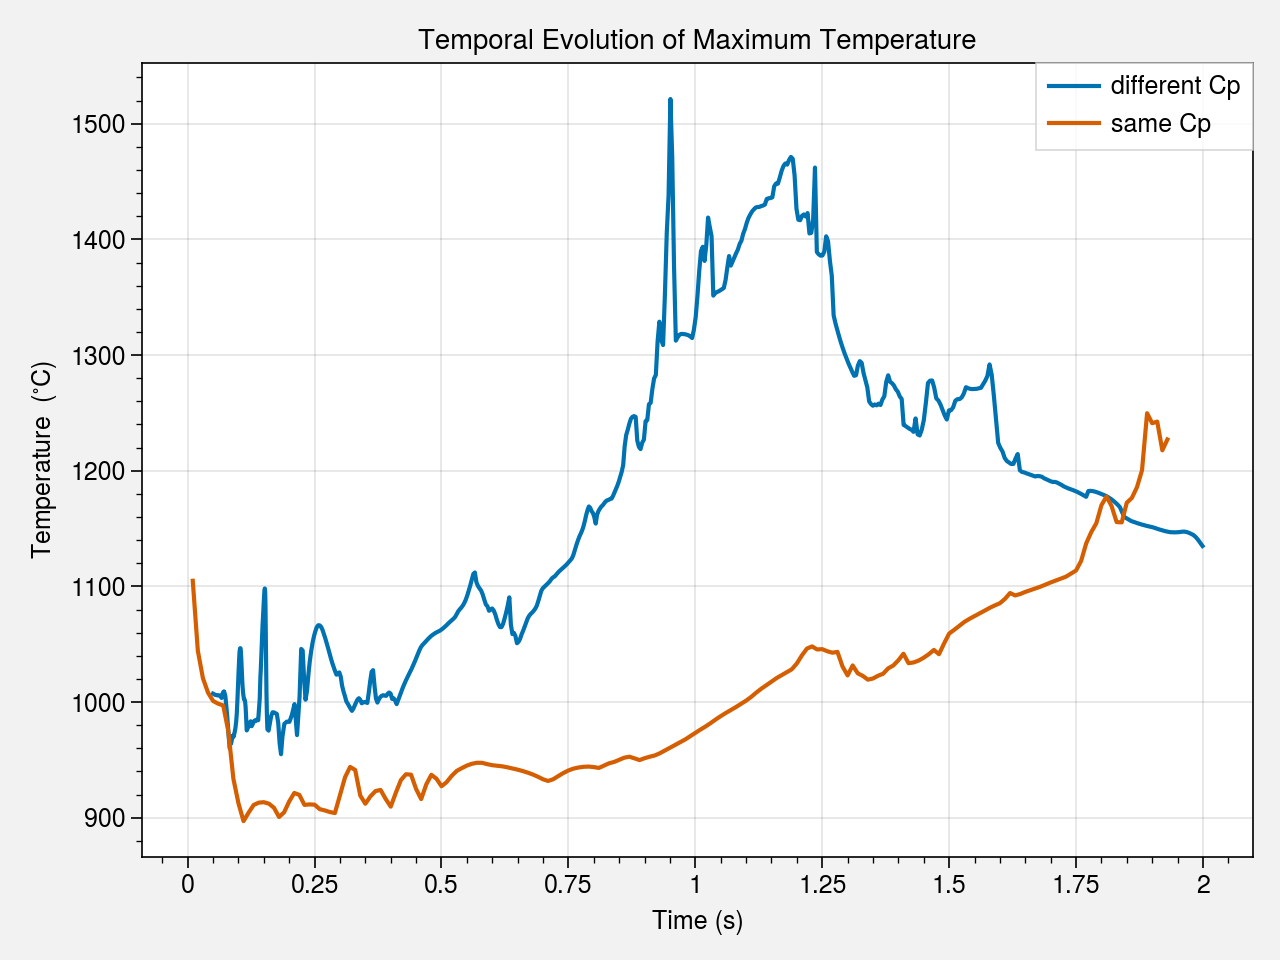

In [27]:
fig, ax = plt.subplots()
ax.plot(df3["Time"],df3["max"],label="different Cp")
ax.plot(df4["Time"],df4["max"],label="same Cp")
ax.set_xlabel(f"Time (s)")
ax.set_ylabel("Temperature  ($^{\circ}$C)")
ax.set_title("Temporal Evolution of Maximum Temperature")
ax.legend()
fig.tight_layout()

### Comments 
- The temporal evolution of temperature are quit different 
- the temperature evolution from the same Cp case is more phsyical, showing the smilar increasing tendency compared to the Pe=0.02, and perivious study of my and Luo group
- Reason: It may be related to the numerical issue. For the same Cp case, the unconvergent PIMPLE loop number is 73, while  the different Cp case at least have 778 unconvergent PIMPLE loops

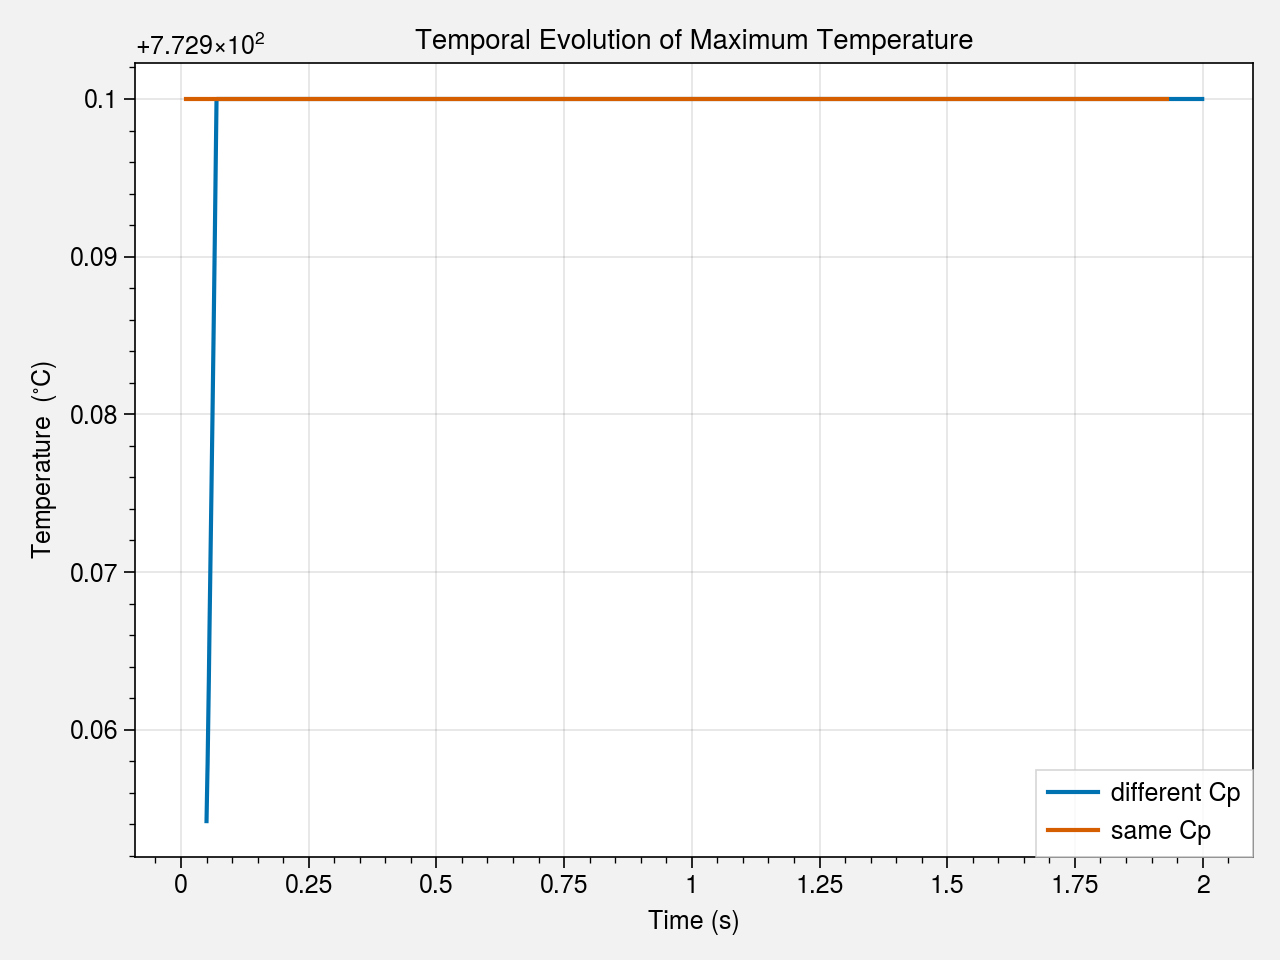

In [29]:
fig, ax = plt.subplots()
ax.plot(df3["Time"],df3["min"],label="different Cp")
ax.plot(df4["Time"],df4["min"],label="same Cp")
ax.set_xlabel(f"Time (s)")
ax.set_ylabel("Temperature  ($^{\circ}$C)")
ax.set_title("Temporal Evolution of Maximum Temperature")
ax.legend()
fig.tight_layout()

### Comments
- The different Cp case got the unphysical min temperature till 0.2 seconds, while the same Cp case only maintain the unphysical temperature at the initial several time steps

## Summary 
- The different Cp for different gas components are truely reaslistic, but the  fully coupling among mass transfer, heat transfer and reactions make the PIMPLE algorithm difficult to converge and derive the physical result.
- In the following study, we will used the average Cp between CO2 and N2 as the characteristic gas component's Cp to work around the numerical issue, but get more reasonable results